# Importing the Data

> This dataset is the csv file from MyCourses but is private for security.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

Reading in the Data.

In [2]:
df = pd.read_csv('/kaggle/input/420hw01/Data_for_Discrete_Events (3).csv')

day_data = {} # setting up a dict to write the 24 hour -> day converstion to

Taking a look at the data.

In [3]:
df

,Hour,NumberOfEvents
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
...,...,...
1675,1676,0
1676,1677,0
1677,1678,0
1678,1679,0


Reseting index.

In [4]:
df.set_index('Hour')

,NumberOfEvents
Hour,
1,0
2,0
3,0
4,0
5,1
...,...
1676,0
1677,0
1678,0


Setting bin size.

In [5]:
binsize = 24

Using a map function to take each hour and it determines the day based on:
> int(hour / binsize+1)

> this means that day falling within each interval 0-23 have their values add to dict entry

> except block catches the first entry of each interval

In [6]:
def create_day_data(row):
    try:
        day_data[int(row['Hour'] / binsize+1)] += row['NumberOfEvents']
    except KeyError:
        day_data[int(row['Hour'] / binsize+1)] = row['NumberOfEvents']

In [7]:
df.apply(create_day_data, axis=1) # applying above function

0       None
1       None
2       None
3       None
4       None
        ... 
1675    None
1676    None
1677    None
1678    None
1679    None
Length: 1680, dtype: object

Create dataframe from dict.

In [8]:
daydf = pd.DataFrame.from_dict(day_data, orient='index')

In [9]:
daydf.head()

,0
1,2
2,2
3,2
4,0
5,3


Renaming columns for readability.

In [10]:
daydf.rename(columns={0: '# of Pieces'}, inplace=True)
daydf.index.rename('day', inplace=True)

Setting length of days and how many ticks for x axis.

In [11]:
len_of_days = daydf.shape[0]
l = [x for x in range(0, len_of_days, 10)]

Plot the barplot using seaborn. Set figsize and different attr for plot.

[Text(0.5, 0, 'Time of Event = Day of Semester'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Events = How many Pieces Submitted for Firing')]

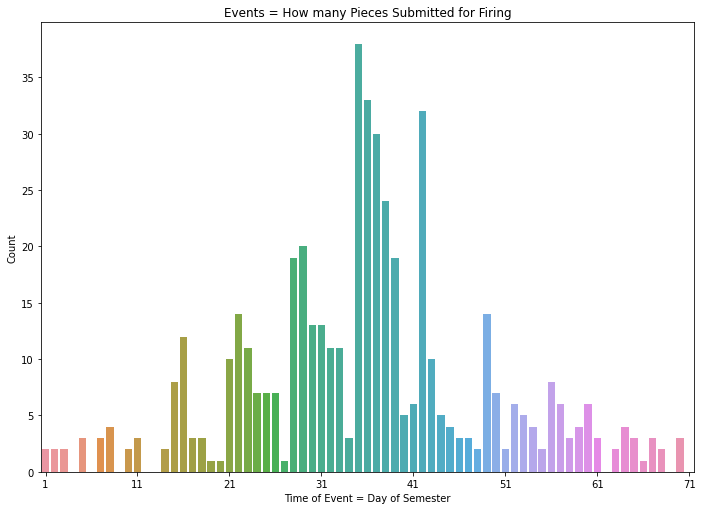

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

fire_pieces = sns.barplot(
    data=daydf,
    x=daydf.index,
    y=daydf['# of Pieces'],
    ax=ax
)

fire_pieces.set(
    xlabel='Time of Event = Day of Semester', 
    ylabel='Count',
    xticks=l,
    title='Events = How many Pieces Submitted for Firing',
)

Compute probability of events based on:
> event_per_day / total_num_events

In [13]:
daydf_prob = daydf / daydf.sum()
daydf_prob.rename(columns={'# of Pieces': 'likelihood of event per day'}, inplace=True)

Plot the barplot using seaborn. Set figsize and different attr for plot.

[Text(0.5, 0, 'Time of Event = Day of Semester'),
 Text(0, 0.5, 'Likelihood of Event per Day'),
 Text(0.5, 1.0, 'Probability of Events Happening per Day')]

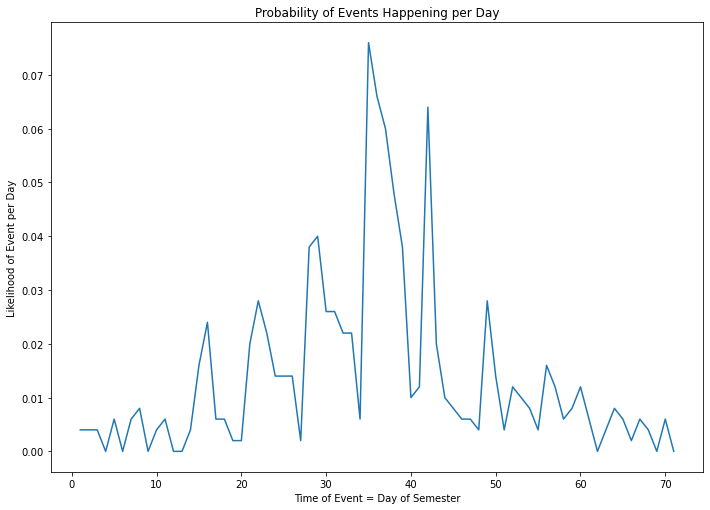

In [14]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

fire_pieces_prob = sns.lineplot(
    data=daydf_prob,
    x=daydf_prob.index,
    y=daydf_prob['likelihood of event per day'],
    ax=ax
)

fire_pieces_prob.set(
    xlabel='Time of Event = Day of Semester', 
    ylabel='Likelihood of Event per Day',
    xticks=l,
    title='Probability of Events Happening per Day'
)

Create array with gausian coefficients.

In [15]:
gausian_coeff = [0.06, 0.12, 0.20, 0.24, 0.20, 0.12, 0.06]

Create probability array with zero edge padding.

In [16]:
padding_offset = 3
padding = padding_offset * [0]
daydf_prob_lst = padding + daydf_prob['likelihood of event per day'].tolist() + padding

Create the PDE list by looping through all non zero values and doing a dot product of the 7 values from that value and its edges with the gausian coeff.

In [17]:
parzen_lst = []
for x in range(padding_offset, len_of_days+padding_offset):
    parzen_lst.append(np.dot(gausian_coeff, np.transpose(daydf_prob_lst[x-padding_offset:(x+1)+padding_offset])))

Plot the barplot using seaborn. Set figsize and different attr for plot.

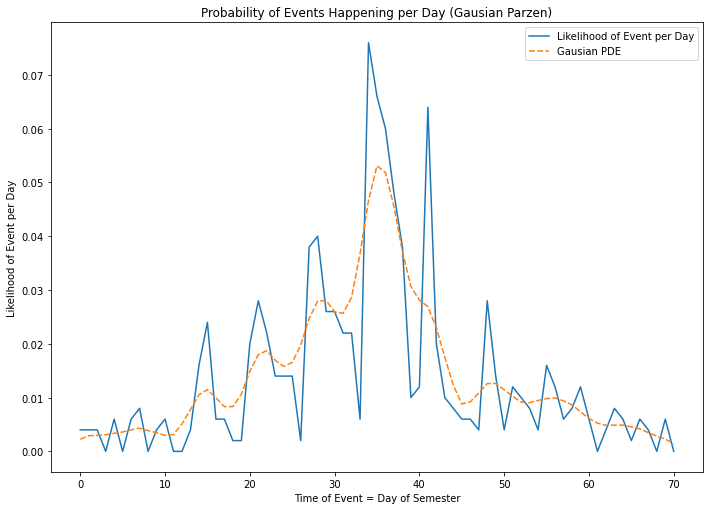

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

fire_pieces_parzen = sns.lineplot(
    data=[daydf_prob['likelihood of event per day'].tolist(), parzen_lst],
    ax=ax
)

fire_pieces_parzen.set(
    xlabel='Time of Event = Day of Semester', 
    ylabel='Likelihood of Event per Day',
    xticks=l,
    title='Probability of Events Happening per Day (Gausian Parzen)'
)
plt.legend(loc='upper right', labels=['Likelihood of Event per Day', 'Gausian PDE'])

[Text(0.5, 0, 'Time of Event = Day of Semester'),
 Text(0, 0.5, 'Likelihood of Event per Day'),
 Text(0.5, 1.0, 'Probability of Events Happening per Day (Gausian Parzen)')]

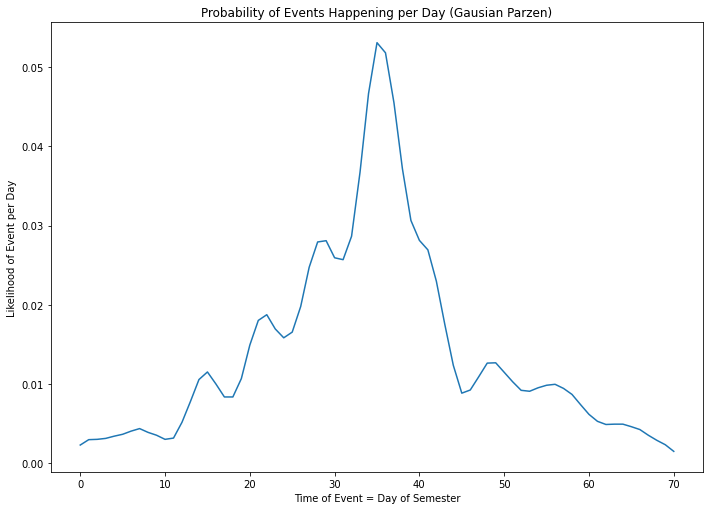

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)

fire_pieces_parzen = sns.lineplot(
    data=parzen_lst,
    ax=ax
)

fire_pieces_parzen.set(
    xlabel='Time of Event = Day of Semester', 
    ylabel='Likelihood of Event per Day',
    xticks=l,
    title='Probability of Events Happening per Day (Gausian Parzen)'
)